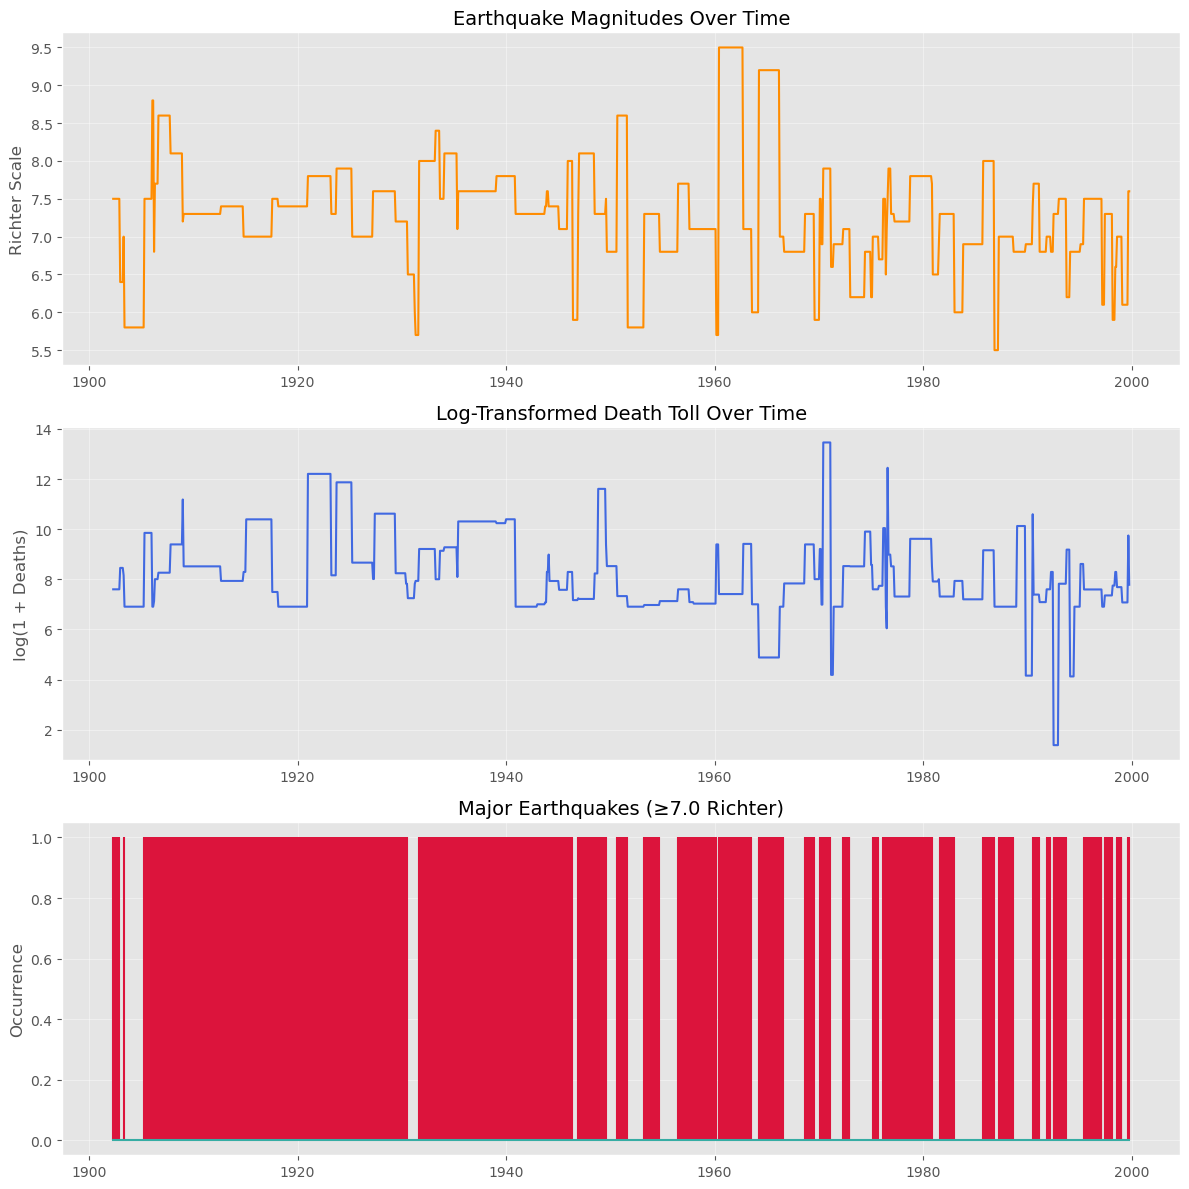

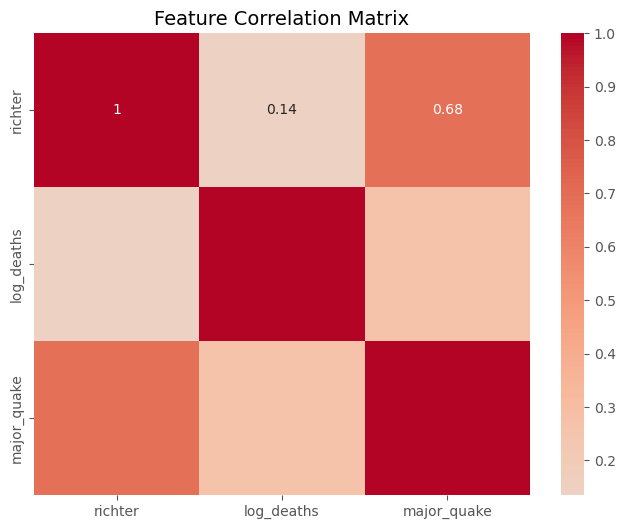


Stationarity Tests:
Variable: richter
ADF Statistic: -7.7886
p-value: 0.0000
Critical Values:
	1%: -3.4360
	5%: -2.8640
	10%: -2.5681
--------------------------------------------------
Variable: log_deaths
ADF Statistic: -8.0116
p-value: 0.0000
Critical Values:
	1%: -3.4360
	5%: -2.8640
	10%: -2.5681
--------------------------------------------------
Variable: major_quake
ADF Statistic: -8.1612
p-value: 0.0000
Critical Values:
	1%: -3.4360
	5%: -2.8640
	10%: -2.5681
--------------------------------------------------
 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -1.355     -1.339*      0.2580     -1.349*
1       -1.365      -1.302      0.2554      -1.341
2       -1.379      -1.269      0.2519      -1.337
3      -1.379*      -1.222     0.2517*      -1.319
4       -1.364      -1.160      0.2556      -1.286
5       -1.367      -1.116      0.2549      -1.271
6       -1.356    

ValueError: x and y must have same first dimension, but have shapes (235,) and (234,)

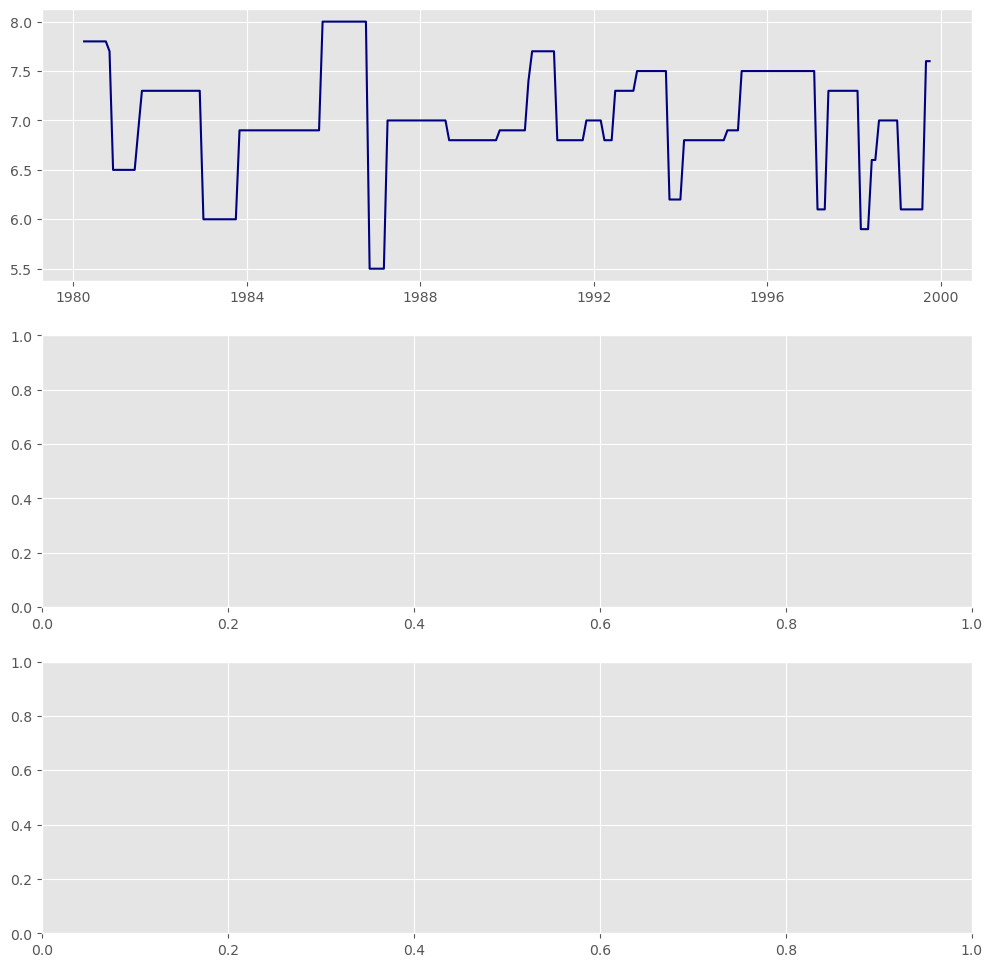

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller, grangercausalitytests
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

# Set modern plotting style
plt.style.use('ggplot')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100

# ====================== DATA LOADING & PREPROCESSING ======================
def load_data():
    data = """year,month,day,richter,area,region,deaths
1902,April,19,7.5,Quezaltenango and San Marco,Guatemala,2000
1902,December,16,6.4,Uzbekistan,Russia,4700
1903,April,28,7,Malazgirt,Turkey,3500
1903,May,28,5.8,Gole,Turkey,1000
1905,April,4,7.5,Kangra,India,19000
1906,January,31,8.8,Esmeraldas (off coast),Ecuador,1000
1906,March,16,6.8,Chia-i,Taiwan,1250
1906,April,18,7.7,San Francisco,United States,3000
1906,August,17,8.6,Valparaiso,Chile,3882
1907,October,21,8.1,Central,Asia,12000
1908,December,28,7.2,Messina,Italy,72000
1909,January,23,7.3,Silakhor,Iran,5000
1912,August,9,7.4,Murefte,Turkey,2800
1914,October,3,7,Burdur,Turkey,4000
1915,January,13,7,Avezzano,Italy,32610
1917,July,30,7.5,Yunnan,China,1800
1918,February,13,7.4,Guangdong,China,1000
1920,December,16,7.8,Gansu,China,200000
1923,March,24,7.3,Sichuan,China,3500
1923,March,25,5.7,Torbat-e Heydariyeh,Iran,2200
1923,September,1,7.9,Yokohama,Japan,142800
1925,March,16,7,Yunnan,China,5800
1927,March,7,7.6,Tango,Japan,3020
1927,May,22,7.6,Gansu,China,40900
1929,May,1,7.2,Koppeh Dagh,Iran,3800
1930,May,6,7.2,Salmas,Iran,2500
1930,July,23,6.5,Irpinia,Italy,1404
1931,March,31,6,Managua,Nicaragua,2500
1931,April,27,5.7,Border,Armenia-Azerbaijan,2800
1931,August,10,8,Xinjiang,China,10000
1933,March,2,8.4,Sanriku,Japan,2990
1933,March,10,6.2,Long Beach,United States,115
1933,August,25,7.5,Sichuan,China,9300
1934,January,15,8.1,Bihar,India-Nepal,10700
1935,April,21,7.1,Miao-Li,Taiwan,3270
1935,May,30,7.6,Quetta,Pakistan,30000
1939,January,25,7.8,Chillan,Chile,28000
1939,December,26,7.8,Erzincan,Turkey,32700
1940,November,10,7.3,Vrancea,Romania,1000
1942,December,20,7.3,Erbaa,Turkey,1100
1943,September,10,7.4,Tottori,Japan,1190
1943,November,26,7.6,Ladik,Turkey,4000
1944,January,15,7.4,San Juan,Argentina,8000
1944,February,1,7.4,Gerede,Turkey,2790
1945,January,12,7.1,Mikawa,Japan,1961
1945,November,27,8,Makran Coast,Pakistan,4000
1946,May,31,5.9,Ustukran,Turkey,1300
1946,November,10,7.3,Ancash,Peru,1400
1946,December,29,8.1,Honshu,Japan,1362
1948,June,28,7.3,Fukui,Japan,3769
1948,October,5,7.3,Ashgabat,Turkmenistan,110000
1949,July,10,7.5,Khait,Tajikistan,12000
1949,August,5,6.8,Pelileo,Ecuador,5050
1950,August,15,8.6,Assam,India,1526
1951,August,2,5.8,Cosiguina,Nicaragua,1000
1953,March,18,7.3,Northwest,Turkey,1070
1954,September,9,6.8,Orleansville,Algeria,1250
1956,June,10,7.7,North,Afghanistan,2000
1957,July,2,7.1,North,Iran,1200
1957,December,13,7.1,West,Iran,1130
1960,February,29,5.7,Agadir,Morocco,12000
1960,May,21,9.5,South,Chile,1655
1962,September,1,7.1,Northwest,Iran,12255
1963,July,26,6,Skopje,Yugoslavia,1100
1964,March,27,9.2,Alaska,United States,131
1966,March,7,7,Hebei,China,1000
1966,March,22,6.9,Hebei,Chine,1000
1966,August,19,6.8,East,Turkey,2529
1968,August,31,7.3,Northeast,Iran,12000
1969,July,25,5.9,Guangdong,China,3000
1970,January,5,7.5,Yunnan,China,10000
1970,March,28,6.9,West,Turkey,1086
1970,May,31,7.9,Chimbote,Peru,700000
1971,February,9,6.6,San Fernando Valley,United States,65
1971,May,22,6.9,SE of Ankara,Turkey,1000
1972,April,10,7.1,South,Iran,5054
1972,December,23,6.2,Managua,Nicaragua,5000
1974,May,10,6.8,NA,China,20000
1974,December,28,6.2,North,Pakistan,5300
1975,February,4,7,Haicheng,China,2000
1975,September,6,6.7,East,Turkey,2300
1976,February,4,7.5,NA,Guatemala,23000
1976,May,6,6.5,Northeast,Italy,1000
1976,June,25,7.1,Irian Jaya,New Guinea,422
1976,July,28,7.5,Tangshan,China,255000
1976,August,16,7.9,Mindanao,Philippines,8000
1976,November,24,7.3,Northwest Border,Iran-Turkey,5000
1977,March,4,7.2,NA,Romania,1500
1978,September,16,7.8,Northeast,Iran,15000
1980,October,10,7.7,Northwest,Algeria,5000
1980,November,23,6.5,South,Italy,2735
1981,June,11,6.9,South,Iran,3000
1981,July,28,7.3,South,Iran,1500
1982,December,13,6,W Arabian Peninsula,NA,2800
1983,October,30,6.9,East,Turkey,1342
1985,September,19,8,Michoacan,Mexico,9500
1986,October,10,5.5,NA,El Salvador,1000
1987,March,6,7,Border,Colombia-Ecuador,1000
1988,August,20,6.8,Border,India-Nepal,1000
1988,December,7,6.8,Spitak,Armenia,25000
1989,October,17,6.9,San Francisco,United States,63
1990,June,20,7.4,West,Iran,40000
1990,July,16,7.7,Luzon,Philippines,1621
1991,February,1,6.8,Border,Pakistan-Afghanistan,1200
1991,October,19,7,North,India,2000
1992,March,13,6.8,East,Turkey,4000
1992,March,15,6,East,Turkey,NA
1992,June,28,7.3,Landers,United States,3
1992,June,28,6.5,Big Bear,United States,NA
1992,December,12,7.5,Flores Island,Indonesia,2500
1993,September,30,6.2,Maharashtra,India,9748
1994,January,17,6.8,Northridge,United States,61
1994,June,6,6.8,Cauca,Colombia,1000
1995,January,16,6.9,Kobe,Japan,5502
1995,May,27,7.5,Sakhalin Island,Russia,1989
1997,February,28,6.1,Northwest,Iran,1000
1997,May,10,7.3,North,Iran,1567
1998,February,4,5.9,Hindu Kush,Afghanistan,2323
1998,May,30,6.6,Border,Afghanistan-Tajikistan,4000
1998,July,17,7,Papua,New Guinea,2183
1999,January,25,6.1,Armenia,Colombia,1185
1999,August,17,7.6,Izmit,Turkey,17118
1999,September,20,7.6,Taichung,Taiwan,2400"""
    
    from io import StringIO
    df = pd.read_csv(StringIO(data))
    
    # Convert month names to numbers
    month_map = {m:i+1 for i,m in enumerate(['January','February','March','April','May','June',
                                           'July','August','September','October','November','December'])}
    df['month'] = df['month'].map(month_map)
    
    # Create datetime index
    df['date'] = pd.to_datetime(df[['year','month','day']])
    df.set_index('date', inplace=True)
    df.sort_index(inplace=True)
    
    # Feature engineering
    df['log_deaths'] = np.log1p(df['deaths'])  # Log transform for skewed death counts
    df['major_quake'] = (df['richter'] >= 7.0).astype(int)  # Binary flag for major quakes
    
    # Select final features
    return df[['richter', 'log_deaths', 'major_quake']]

df = load_data()

# Resample to monthly frequency (max values)
df_monthly = df.resample('M').max().ffill()

# ====================== EXPLORATORY VISUALIZATIONS ======================
fig, axes = plt.subplots(3, 1, figsize=(12, 12))

# Time series of earthquake magnitudes
axes[0].plot(df_monthly.index, df_monthly['richter'], color='darkorange')
axes[0].set_title('Earthquake Magnitudes Over Time', fontsize=14)
axes[0].set_ylabel('Richter Scale')
axes[0].grid(alpha=0.4)

# Time series of log deaths
axes[1].plot(df_monthly.index, df_monthly['log_deaths'], color='royalblue')
axes[1].set_title('Log-Transformed Death Toll Over Time', fontsize=14)
axes[1].set_ylabel('log(1 + Deaths)')
axes[1].grid(alpha=0.4)

# Major earthquakes
axes[2].stem(df_monthly.index, df_monthly['major_quake'], linefmt='crimson', markerfmt=' ')
axes[2].set_title('Major Earthquakes (≥7.0 Richter)', fontsize=14)
axes[2].set_ylabel('Occurrence')
axes[2].grid(alpha=0.4)

plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df_monthly.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix', fontsize=14)
plt.show()

# ====================== STATIONARITY CHECK ======================
def check_stationarity(series):
    result = adfuller(series.dropna())
    print(f'Variable: {series.name}')
    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.4f}')
    print('-'*50)

print("\nStationarity Tests:")
for col in df_monthly.columns:
    check_stationarity(df_monthly[col])

# Differencing to achieve stationarity
df_stationary = df_monthly.diff().dropna()

# ====================== VAR MODEL IMPLEMENTATION ======================
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_stationary)
df_scaled = pd.DataFrame(scaled_data, index=df_stationary.index, 
                         columns=df_stationary.columns)

# Train-test split (80-20)
n_obs = int(len(df_scaled)*0.8)
train, test = df_scaled[:n_obs], df_scaled[n_obs:]

# Lag order selection
model = VAR(train)
lag_results = model.select_order(maxlags=12)
print(lag_results.summary())

# Fit model with optimal lags (using AIC)
optimal_lags = lag_results.aic
var_model = VAR(train)
fitted_model = var_model.fit(optimal_lags)
print(fitted_model.summary())

# ====================== FORECASTING & EVALUATION ======================
# Forecast on test set
lag_order = fitted_model.k_ar
forecast = fitted_model.forecast(train.values[-lag_order:], steps=len(test))

# Inverse transform
def inverse_transform(forecast, original_df, scaler):
    dummy = np.zeros((len(forecast), original_df.shape[1]))
    for i in range(original_df.shape[1]):
        dummy[:,i] = forecast[:,i]
    return scaler.inverse_transform(dummy)

forecast_inv = inverse_transform(forecast, df_stationary, scaler)
test_inv = inverse_transform(test.values, df_stationary, scaler)

# Calculate RMSE
for i, col in enumerate(df_stationary.columns):
    actual = test_inv[:,i]
    pred = forecast_inv[:,i]
    rmse_val = rmse(actual, pred)
    print(f'RMSE for {col}: {rmse_val:.4f}')

# ====================== VISUALIZATION OF RESULTS ======================
# Plot forecasts vs actuals
fig, axes = plt.subplots(3, 1, figsize=(12, 12))

# Richter scale
axes[0].plot(df_monthly.index[n_obs:], df_monthly['richter'].iloc[n_obs:], 
             label='Actual', color='navy')
axes[0].plot(df_monthly.index[n_obs:], df_monthly['richter'].iloc[n_obs-1] + np.cumsum(forecast_inv[:,0]), 
             label='Forecast', linestyle='--', color='orange')
axes[0].set_title('Earthquake Magnitude: Actual vs Forecast', fontsize=14)
axes[0].set_ylabel('Richter Scale')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Death toll (original scale)
axes[1].plot(df_monthly.index[n_obs:], np.expm1(df_monthly['log_deaths'].iloc[n_obs:]), 
             label='Actual', color='navy')
axes[1].plot(df_monthly.index[n_obs:], np.expm1(df_monthly['log_deaths'].iloc[n_obs-1] + np.cumsum(forecast_inv[:,1])), 
             label='Forecast', linestyle='--', color='orange')
axes[1].set_title('Death Toll: Actual vs Forecast', fontsize=14)
axes[1].set_ylabel('Number of Deaths')
axes[1].legend()
axes[1].grid(alpha=0.3)

# Major quakes probability
axes[2].plot(df_monthly.index[n_obs:], df_monthly['major_quake'].iloc[n_obs:], 
             label='Actual', color='navy')
axes[2].plot(df_monthly.index[n_obs:], (df_monthly['major_quake'].iloc[n_obs-1] + np.cumsum(forecast_inv[:,2]) > 0.5).astype(int), 
             label='Forecast', linestyle='--', color='orange')
axes[2].set_title('Major Earthquake Occurrence: Actual vs Forecast', fontsize=14)
axes[2].set_ylabel('Probability')
axes[2].legend()
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# ====================== FORECAST INTO FUTURE ======================
# 12-month forecast
n_forecast = 12
future_forecast = fitted_model.forecast(df_scaled.values[-lag_order:], steps=n_forecast)
future_forecast_inv = inverse_transform(future_forecast, df_stationary, scaler)

# Create future dates
last_date = df_monthly.index[-1]
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=n_forecast, freq='M')

# Plot future forecast
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Magnitude forecast
axes[0].plot(df_monthly.index[-24:], df_monthly['richter'].iloc[-24:], label='Historical', color='navy')
axes[0].plot(future_dates, df_monthly['richter'].iloc[-1] + np.cumsum(future_forecast_inv[:,0]), 
         label='Forecast', marker='o', color='darkorange')
axes[0].set_title('12-Month Magnitude Forecast')
axes[0].set_ylabel('Richter Scale')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Death toll forecast
axes[1].plot(df_monthly.index[-24:], np.expm1(df_monthly['log_deaths'].iloc[-24:]), label='Historical', color='navy')
axes[1].plot(future_dates, np.expm1(df_monthly['log_deaths'].iloc[-1] + np.cumsum(future_forecast_inv[:,1])), 
         label='Forecast', marker='o', color='darkorange')
axes[1].set_title('12-Month Death Toll Forecast')
axes[1].set_ylabel('Number of Deaths')
axes[1].legend()
axes[1].grid(alpha=0.3)

# Major quake probability
axes[2].plot(df_monthly.index[-24:], df_monthly['major_quake'].iloc[-24:], label='Historical', color='navy')
axes[2].plot(future_dates, (df_monthly['major_quake'].iloc[-1] + np.cumsum(future_forecast_inv[:,2])) > 0.5, 
         label='Forecast', marker='o', color='darkorange')
axes[2].set_title('Major Earthquake Probability')
axes[2].set_ylabel('Probability')
axes[2].legend()
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Print numerical forecasts
print("\n12-Month Forecast Summary:")
forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Magnitude': df_monthly['richter'].iloc[-1] + np.cumsum(future_forecast_inv[:,0]),
    'Death_Estimate': np.expm1(df_monthly['log_deaths'].iloc[-1] + np.cumsum(future_forecast_inv[:,1])),
    'Major_Quake_Probability': 1/(1+np.exp(-(df_monthly['major_quake'].iloc[-1] + np.cumsum(future_forecast_inv[:,2]))))
})

print(forecast_df.round(2))